# EDA on the `MLA_100k_checked_v3` dataset

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from utils import *

## Load the dataset

In [2]:
X_dataframe = pd.read_csv("../data/X_dataframe.csv")
X_dataframe.head()

,seller_address,warranty,base_price,shipping,non_mercado_pago_payment_methods,seller_id,variations,listing_type_id,price,attributes,...,secure_thumbnail,stop_time,status,video_id,catalog_product_id,initial_quantity,start_time,sold_quantity,available_quantity,used
0,"{'country': {'name': 'Argentina', 'id': 'AR'},...",NaN,80.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",8208882349,[],bronze,80.0,[],...,https://a248.e.akamai.net/mla-s1-p.mlstatic.co...,1446669773000,active,NaN,NaN,1,1441485773000,0,1,False
1,"{'country': {'name': 'Argentina', 'id': 'AR'},...",NUESTRA REPUTACION,2650.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",8141699488,[],silver,2650.0,[],...,https://a248.e.akamai.net/mla-s1-p.mlstatic.co...,1448474910000,active,NaN,NaN,1,1443290910000,0,1,True
2,"{'country': {'name': 'Argentina', 'id': 'AR'},...",NaN,60.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",8386096505,[],bronze,60.0,[],...,https://a248.e.akamai.net/mla-s1-p.mlstatic.co...,1447027027000,active,NaN,NaN,1,1441843027000,0,1,True
3,"{'country': {'name': 'Argentina', 'id': 'AR'},...",NaN,580.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",5377752182,[],silver,580.0,[],...,https://a248.e.akamai.net/mla-s2-p.mlstatic.co...,1449191596000,active,NaN,NaN,1,1443466076000,0,1,False
4,"{'country': {'name': 'Argentina', 'id': 'AR'},...",MI REPUTACION.,30.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",2938071313,[],bronze,30.0,[],...,https://a248.e.akamai.net/mla-s2-p.mlstatic.co...,1445638040000,active,NaN,NaN,1,1440454040000,0,1,True


### Tags

In [6]:
X_dataframe["tags"].describe()


count                           90000
unique                              8
top       ['dragged_bids_and_visits']
freq                            65315
Name: tags, dtype: object

In [7]:
X_dataframe["tags"].value_counts()

tags
['dragged_bids_and_visits']                              65315
[]                                                       22412
['good_quality_thumbnail', 'dragged_bids_and_visits']     1191
['dragged_visits']                                         464
['good_quality_thumbnail']                                 346
['dragged_visits', 'free_relist']                          259
['poor_quality_thumbnail', 'dragged_bids_and_visits']       10
['poor_quality_thumbnail']                                   3
Name: count, dtype: int64

In [8]:
import ast

X_dataframe["tags"] = X_dataframe["tags"].apply(ast.literal_eval)
X_dataframe["tags"].value_counts()

tags
[dragged_bids_and_visits]                            65315
[]                                                   22412
[good_quality_thumbnail, dragged_bids_and_visits]     1191
[dragged_visits]                                       464
[good_quality_thumbnail]                               346
[dragged_visits, free_relist]                          259
[poor_quality_thumbnail, dragged_bids_and_visits]       10
[poor_quality_thumbnail]                                 3
Name: count, dtype: int64

In [9]:
possible_tags = list(X_dataframe["tags"].value_counts().index)
all_tags = []
for tag in possible_tags:
    all_tags.extend(tag)
possible_tags = list(set(all_tags))
possible_tags


['free_relist',
 'good_quality_thumbnail',
 'dragged_visits',
 'poor_quality_thumbnail',
 'dragged_bids_and_visits']

## Empty tags

In [10]:
X_dataframe["empty_tags"] = X_dataframe["tags"].apply(lambda x: len(x) == 0)
X_dataframe["empty_tags"].value_counts()

empty_tags
False    67588
True     22412
Name: count, dtype: int64

In [11]:
res = column_analysis("empty_tags", X_dataframe)
display(res)

,n,prop_used,ci_lower,ci_upper
empty_tags,,,,
False,67588,0.465378,0.461620,0.469141
True,22412,0.454846,0.448335,0.461372


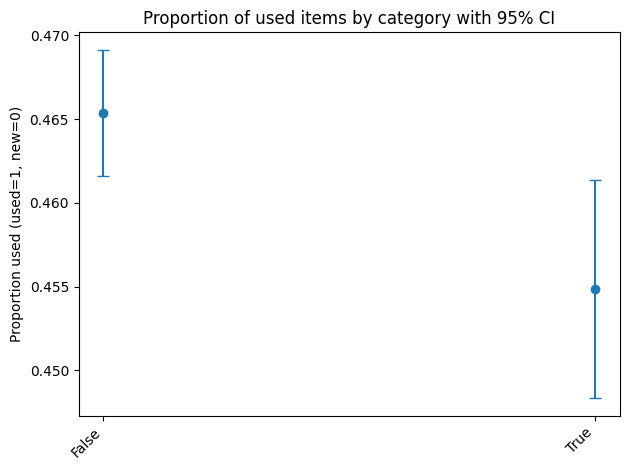

In [146]:
plot_column_analysis(res)

Same distribution

## dragged_bids_and_visits

In [12]:
X_dataframe["tags_dragged_bids_and_visits"]=X_dataframe["tags"].apply(lambda x: "dragged_bids_and_visits" in x)

In [13]:
res = column_analysis(
    "tags_dragged_bids_and_visits",
    X_dataframe
)
res

,n,prop_used,ci_lower,ci_upper
tags_dragged_bids_and_visits,,,,
True,66516,0.463663,0.459875,0.467455
False,23484,0.460186,0.453818,0.466566


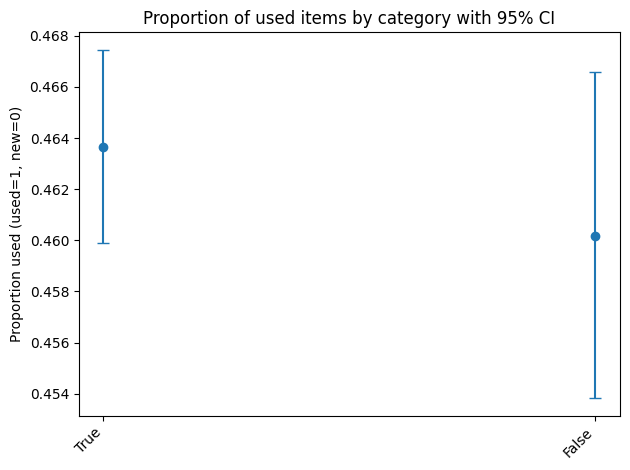

In [14]:
plot_column_analysis(res)

Not at all conclusive

#### dragged_visits

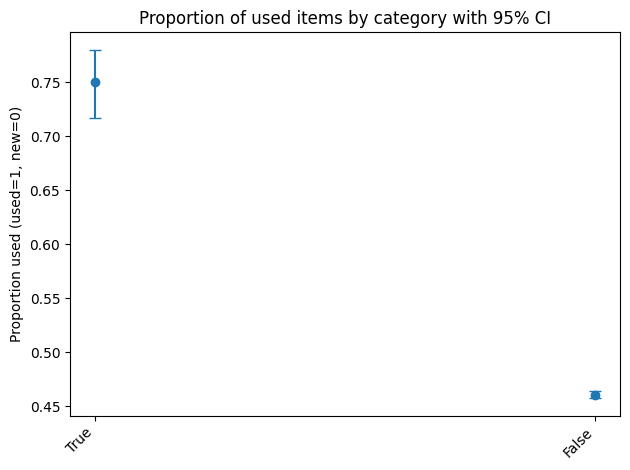

In [15]:
X_dataframe["dragged_visits"] = X_dataframe["tags"].apply(lambda x: "dragged_visits" in x)
res = column_analysis(
    "dragged_visits",
    X_dataframe
)
plot_column_analysis(res)


In [16]:
res

,n,prop_used,ci_lower,ci_upper
dragged_visits,,,,
True,723,0.749654,0.716812,0.779857
False,89277,0.460432,0.457164,0.463703


Very little amount of dragged visits

## free_relist

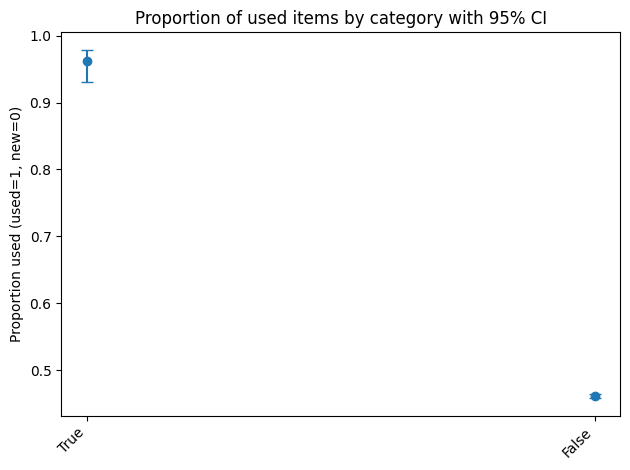

In [17]:
X_dataframe["tags_free_relist"] = X_dataframe["tags"].apply(lambda x: "free_relist" in x)
res = column_analysis(
    "tags_free_relist",
    X_dataframe
)
plot_column_analysis(res)


In [18]:
res

,n,prop_used,ci_lower,ci_upper
tags_free_relist,,,,
True,259,0.961390,0.930398,0.978895
False,89741,0.461316,0.458057,0.464580


Very little amount of free relist

#### good_quality_thumbnail

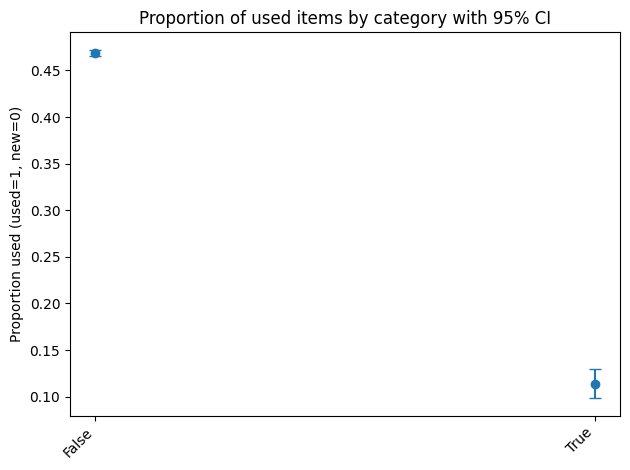

In [19]:
X_dataframe["tags_good_quality_thumbnail"] = X_dataframe["tags"].apply(lambda x: "good_quality_thumbnail" in x)
res = column_analysis(
    "tags_good_quality_thumbnail",
    X_dataframe
)
plot_column_analysis(res)


In [20]:
res

,n,prop_used,ci_lower,ci_upper
tags_good_quality_thumbnail,,,,
False,88463,0.468829,0.465542,0.472119
True,1537,0.113208,0.098322,0.130022


Almost 99% of the data doesn't have the tag

#### poor_quality_thumbnail

In [23]:
X_dataframe["tags"].apply(lambda x: "poor_quality_thumbnail" in x).value_counts()

tags
False    89987
True        13
Name: count, dtype: int64

Not enough poor quality thumbnail tag